In [1]:
import sys, os
if '..' not in sys.path:
    sys.path.insert(0, '..')

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from clones.annotation import validation

In [5]:
validation.Scoring()

<module 'clones.annotation.validation' from '../clones/annotation/validation.py'>

In [70]:
control_path = '/Users/Sebi/Documents/grad_school/research/pnt_expression/flyeye_suite/discs/np/control_clones/discs/'
controls = {i: Silhouette(p) for i, p in enumerate(glob(os.path.join(control_path, '*.silhouette')))}

perturbation_path = '/Users/Sebi/Documents/grad_school/research/pnt_expression/flyeye_suite/discs/np/yan_clones/discs/'
mutants = {i: Silhouette(p) for i, p in enumerate(glob(os.path.join(perturbation_path, '*.silhouette')))}

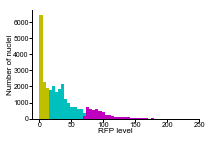

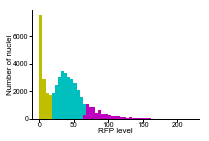

In [97]:
# control_groups = {
#     0: {0:0, 1:1, 2:1, 3:1, 4:2, 5:2, 6:2},
#     1: {0:0, 1:1, 2:1, 3:1, 4:2, 5:2}}

control_groups = {
    0: {0:0, 1:1, 2:1, 3:2, 4:2},
    1: {0:0, 1:1, 2:1, 3:2, 4:2}}

_ = [s.annotate(control_groups[i]) for i, s in controls.items()]
_ = [s.classifier.show() for s in controls.values()]

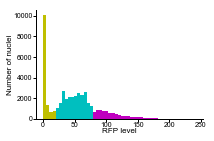

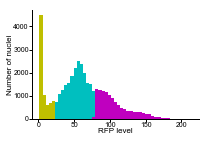

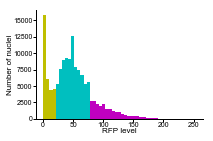

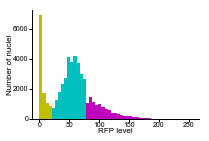

In [105]:
mutant_groups = {
    0: {0:0, 1:1, 2:1, 3:2, 4:2},# 5:2, 6:2},
    1: {0:0, 1:1, 2:1, 3:2, 4:2},# 5:2, 6:2}, 
    2: {0:0, 1:1, 2:1, 3:2, 4:2},# 5:2, 6:2},
    3: {0:0, 1:1, 2:1, 3:2, 4:2}}# 5:2, 6:2}}

_ = [s.annotate(mutant_groups[i]) for i, s in mutants.items()]
_ = [s.classifier.show() for s in mutants.values()]

Control: 94.31% correct
Mutant: 94.53% correct


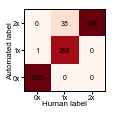

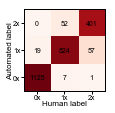

In [113]:
# compile all scores
control_scoring = reduce(add, [s.get_scoring() for s in controls.values()])
control_scoring.score(text='counts', fontsize=7, figsize=(1.5, 1.5))
print('Control: {:0.2%} correct'.format(control_scoring.percent_correct))
control_scoring.matrix.save('control_classifier_scores')


mutant_scoring = reduce(add, [s.get_scoring() for s in mutants.values()])
mutant_scoring.score(text='counts', fontsize=7, figsize=(1.5, 1.5))
print('Mutant: {:0.2%} correct'.format(mutant_scoring.percent_correct))
mutant_scoring.matrix.save('perturbation_classifier_scores')



Overall: 94.48% correct


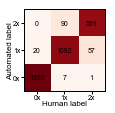

In [108]:
overall_scoring = control_scoring+mutant_scoring
overall_scoring.score(text='counts', fontsize=7, figsize=(1.5, 1.5))
print('Overall: {:0.2%} correct'.format(overall_scoring.percent_correct))

In [109]:
overall_scoring.matrix.save()

In [130]:
fig, ax = plt.subplots(figsize=(1, .2))
ax.axis('off')

x = np.linspace(0, 1, 100).reshape(1, -1)


ax.imshow(np.tile(x, (10, 1)), cmap=plt.cm.Reds)
fig.savefig('colorbar.pdf', format='pdf', dpi=300, rasterized=True, transaprent=True)

(10, 100)